Using device: cpu


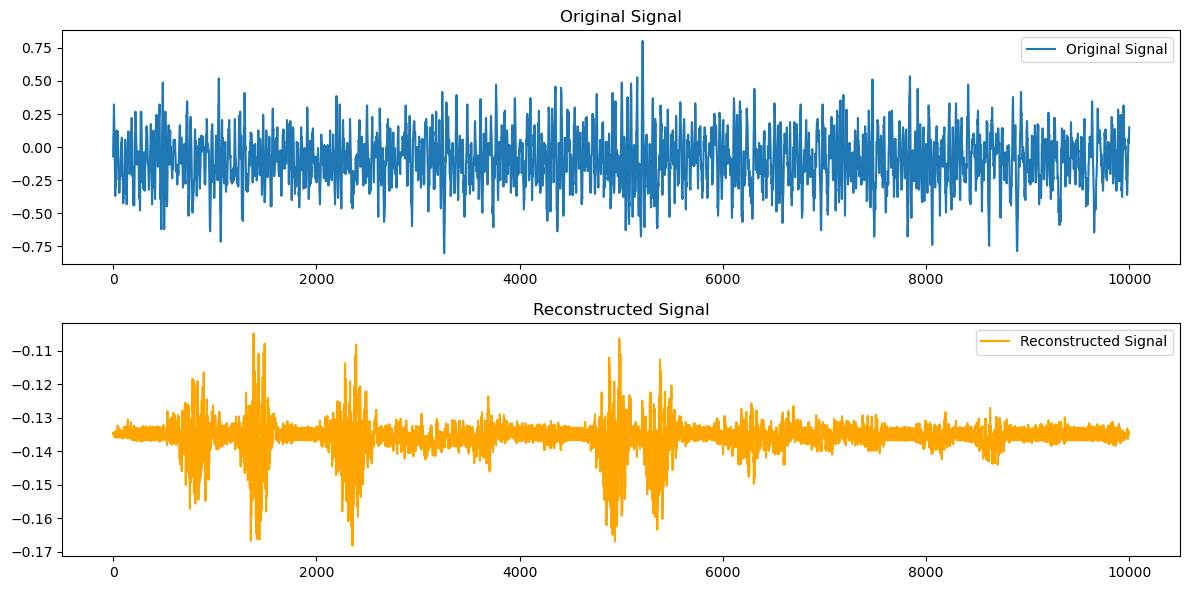

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vae_v1 import VAE

# Helper function to scale and process "real" data into sequences of size 10000
def split_into_sequences(df, sequence_length):
    data = df['Intensity'].values
    
    # Scaling data to be between -1 and 1
    data_min = data.min()
    data_max = data.max()
    data = 2 * (data - data_min) / (data_max - data_min) - 1
    
    # Splitting into sequences
    num_sequences = len(data) // sequence_length
    sequences = np.array([data[i*sequence_length:(i+1)*sequence_length] for i in range(num_sequences)])
    
    return sequences

# Check for GPU support
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the trained VAE model
vae = torch.load('saved_models/vae_v1.pth', map_location=device)
vae.eval()

# Load and preprocess the real data
def preprocess_data(file_path, sequence_length):
    df = pd.read_csv(file_path)
    sequences = split_into_sequences(df, sequence_length)
    return sequences

# Define the file path and sequence length
file_path = 'puf_dataset_07_14/2Can-D7-50mA-long1.csv'
sequence_length = 10000
X = preprocess_data(file_path, sequence_length)

# Take the first sequence
original_signal = torch.tensor(X[0], dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)

# Perform reconstruction
with torch.no_grad():
    reconstructed_signal, _, _ = vae(original_signal)
    
# Move data back to CPU and convert to numpy for plotting
original_signal_np = original_signal.cpu().numpy().flatten()
reconstructed_signal_np = reconstructed_signal.cpu().numpy().flatten()

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(original_signal_np, label='Original Signal')
plt.title('Original Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal_np, label='Reconstructed Signal', color='orange')
plt.title('Reconstructed Signal')
plt.legend()

plt.tight_layout()
plt.show()
